# Allpass Filter

In [1]:
# Setup
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal
import sys
import requests
import io

# URL of the raw wave file on GitHub
# un-comment the URL of the file you want to use
# ATF Drums
#github_url = "https://raw.githubusercontent.com/kevbrnen/Music-Technology-Final-Project/main/Sound%20Examples/Testing_Files/Around%20the%20fur%20drums.wav"
# KYW inst
github_url = "https://raw.githubusercontent.com/kevbrnen/Music-Technology-Final-Project/main/Sound%20Examples/Testing_Files/KYW%20Inst.wav"

# Fetch the wave file from GitHub
response = requests.get(github_url)

# Check if the request was successful
if response.status_code == 200:
    # Read the wave data from the response content
    wave_data = io.BytesIO(response.content)
    
    # Read the wave file 
    fs, data = wavfile.read(wave_data)
    
else:
    print("Failed to fetch the wave file from GitHub")


# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.9484677314758301
Max Value: 0.9998999834060669


In [2]:
# Allpass filter implementation from W3

# Variables
fs = 44100
corner_freq = 1000
Q = 0.75

w0 = 2 * np.pi * (corner_freq/fs)

cos_w0 = np.cos(w0)

sin_w0 = np.sin(w0)

alpha = sin_w0/(2 * Q)


#Coefficients
b0 = 1 - alpha
b1 = -2 * cos_w0
b2 = 1 + alpha
a0 = 1 + alpha
a1 = -2 * cos_w0
a2 = 1 - alpha

num_2 = [b0, b1, b2]
den_2 = [a0, a1, a2]

w2, H2 = signal.freqz(num_2, den_2)

In [3]:
# First order from equation

a1_1 = -0.9
num_1 = [a1_1, 1]
den_1 = [1, a1_1]

w1, H1 = signal.freqz(num_1, den_1)

/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_41452/718976064.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_41452/718976064.py:28: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits


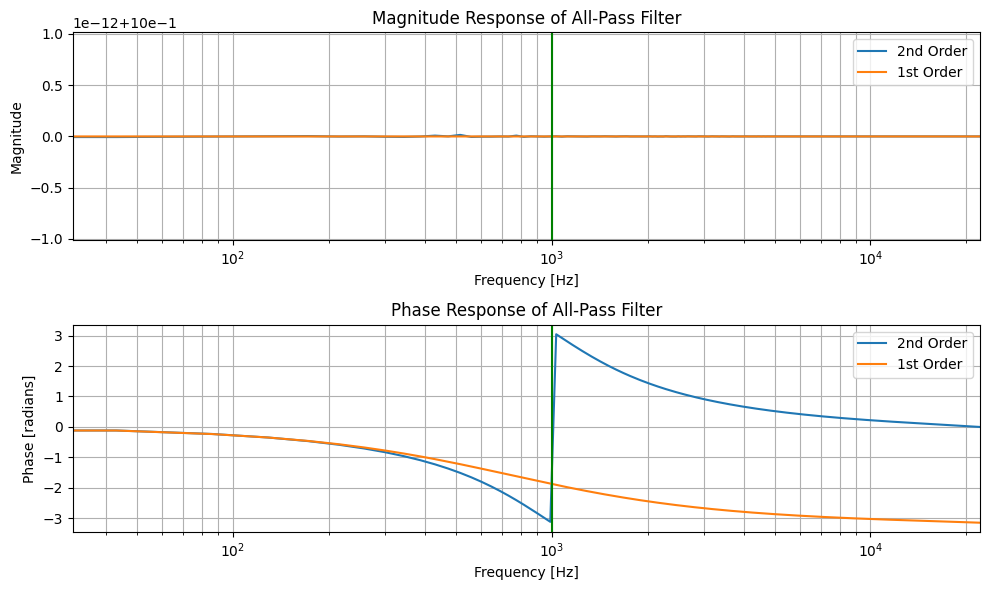

In [4]:
freq_hz = w2 * (fs / (2 * np.pi))

freq_hz_1 = w1 * (fs / (2 * np.pi))

# Plot magnitude and phase responses in Hz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_hz, np.abs(H2), label='2nd Order')
plt.plot(freq_hz_1, np.abs(H1), label='1st Order')
plt.title('Magnitude Response of All-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.axvline(corner_freq, color='green')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(freq_hz, np.angle(H2), label='2nd Order')
plt.plot(freq_hz_1, np.angle(H1), label='1st Order')
plt.title('Phase Response of All-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.axvline(corner_freq, color='green')
plt.legend()


plt.tight_layout()
plt.show()

In [5]:
output = signal.lfilter(num_1, den_1, data)

In [14]:
sd.play(output, fs)

In [17]:
#Write to wav file
#sf.write('AllPass_KYW.wav',output, fs,)